<a href="https://colab.research.google.com/github/abhich2507/Numerical_Python/blob/main/Assn3_P452_1911007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1

import numpy as np
def mag(xs):
    return np.sqrt(np.sum(xs*xs))
def qrdec(A):
    n = A.shape[0]
    Ap = np.copy(A)
    Q = np.zeros((n,n))
    R = np.zeros((n,n))
    for j in range(n):
        for i in range(j):
            R[i,j] = Q[:,i]@A[:,j]
            Ap[:,j] -= R[i,j]*Q[:,i]
        R[j,j] = mag(Ap[:,j])
        Q[:,j] = Ap[:,j]/R[j,j]
    return Q, R
A=np.array([[4.0,2.0/3.0,-4.0/3.0,4.0/3.0],[2.0/3.0,4.0,0,0],[-4.0/3.0,0,6,2],[4.0/3.0,0.0,2.0,6.0]],dtype=complex)
'''
Q,R=qrdec(A)
print('Q=',Q)
print('R=',R)
'''
for k in range(1,20):
    Q,R=qrdec(A)
    A=R@Q
    m=[]
    for i in range(1,np.shape(A)[0]):
        for j in range(i+1):
            m.append(abs(A[i][j]))
    f=sum(m)
    if f<=0.00001:
        break
eigenvalues=np.diagonal(A)
print('A=',A)
print('Q=',Q)
print('eigenvalues=',eigenvalues)

A= [[ 6.00000000e+00  3.31152776e-15 -5.24604773e-14  3.44156801e-09]
 [ 3.28225807e-15  4.00000000e+00  1.21079839e-11 -1.90734863e-06]
 [-5.30689896e-14  1.21084736e-11  8.00000000e+00  3.27398426e-11]
 [ 3.44156639e-09 -1.90734863e-06  3.27418150e-11  2.00000000e+00]]
Q= [[ 1.00000000e+00 -1.64109789e-15  6.63363074e-15 -1.72078319e-09]
 [ 3.28216462e-15  1.00000000e+00 -1.51356311e-12  9.53674316e-07]
 [-6.63365891e-15  1.51357872e-12  1.00000000e+00 -1.63709061e-11]
 [ 1.72078319e-09 -9.53674316e-07  1.63709075e-11  1.00000000e+00]]
eigenvalues= [6. 4. 8. 2.]


<ipython-input-2-8d2af50ea353>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  R[j,j] = mag(Ap[:,j])
<ipython-input-2-8d2af50ea353>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[:,j] = Ap[:,j]/R[j,j]
<ipython-input-2-8d2af50ea353>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  R[i,j] = Q[:,i]@A[:,j]


#1b

In [4]:
import numpy as np

# Define the matrix
A = np.array([[4.0, 2.0/3.0, -4.0/3.0, 4.0/3.0],
              [2.0/3.0, 4.0, 0, 0],
              [-4.0/3.0, 0, 6, 2],
              [4.0/3.0, 0.0, 2.0, 6.0]], dtype=complex)

# Choose an initial guess for the eigenvector
v_initial = np.array([1, 1, 1, 1])

# Define a function to calculate the relative error
def relative_error(new_val, old_val):
    return abs((new_val - old_val) / new_val) * 100

# Initialize variables
old_eigenvalue = 0.0
tolerance = 0.0001

# Iterative method to find the largest eigenvalue and its corresponding eigenvector
while True:
    v_updated = np.dot(A, v_initial)
    eigenvalue = np.linalg.norm(v_updated)
    error = relative_error(eigenvalue, old_eigenvalue)
    v_updated = v_updated / eigenvalue

    # Check if the error is within tolerance
    if error < tolerance:
        break

    old_eigenvalue = eigenvalue
    v_initial = v_updated

# Print the results
print('Largest eigenvalue =', eigenvalue)
print('Eigenvector =', v_updated)


Largest eigenvalue = 7.999992178241464
Eigenvector = [1.12119132e-03+0.j 3.74030152e-04+0.j 7.06358506e-01+0.j
 7.07853278e-01+0.j]


#2A

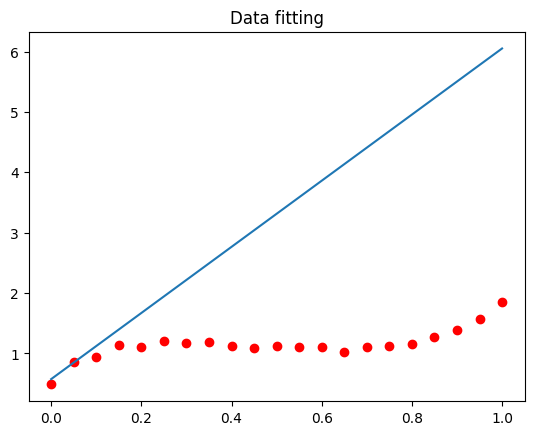

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.00,1.05,0.05)
y=np.array([0.486,0.866,0.944,1.144,1.103,1.202,1.166,1.191,1.124,1.095,1.122,1.102,1.099,1.017,1.111,1.117,1.152,1.265,1.380,1.575,1.857])
x2=x**2
x3=x**3
x4=x**4
x5=x**5
x6=x**6
xy=x*y
x2y=x2*y
x3y=x3*y
sumx=np.sum(x)
sumy=np.sum(y)
sumx2=np.sum(x2)
sumx3=np.sum(x3)
sumx4=np.sum(x4)
sumx5=np.sum(x5)
sumx6=np.sum(x6)
sumxy=np.sum(xy)
sumx2y=np.sum(x2y)
sumx3y=np.sum(x3y)
A=np.array([[len(x),sumx,sumx2,sumx3],[sumx,sumx2,sumx3,sumx4],[sumx2,sumx3,sumx4,sumx5],[sumx3,sumx4,sumx5,sumx6]])
B=np.array([sumy,sumxy,sumx2y,sumx3y])
X=np.linalg.solve(A, B)
def f(x,a,b,c,d):
    return a + b*x + c*x*2 + d*x*3
plt.scatter(x,y,color='r')
plt.title("Data fitting")
plt.plot(x,f(x,X[0],X[1],X[2],X[3]))

#2B

In [5]:
#2b
data = np.genfromtxt("assign3fit.txt")
x, y = data[:, 0], data[:, 1]
x, y

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 array([0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 1.191, 1.124,
        1.095, 1.122, 1.102, 1.099, 1.017, 1.111, 1.117, 1.152, 1.265,
        1.38 , 1.575, 1.857]))

In [6]:
yerr = np.tile([0.001], x.shape[0])
yerr

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001])

In [12]:


import numpy as np
from matplotlib import pyplot as plt

from assn_3_utils import mlcgList, gauss_seidel, gauss_elim

def poly(n, x):
    return x ** n

def cheby(n, x):
    chebyshev = {
        0: 1,
        1: x,
        2: 2 * x ** 2 - 1,
        3: 4 * x ** 3 - 3 * x,
    }

    return chebyshev[n]

def polyfit(x, y, yerr, n=2, basis="poly"):
    """
    Polynomial Least-Squares Fitting

    """
    bases = {
        "poly": poly,
        "cheby": cheby
    }

    basis = bases[basis]

    N = n + 1
    A = np.empty((N, N))
    b = np.empty(N)

    for i in range(N):
        for j in range(N):
            A[i, j] = np.sum(basis(i, x) * basis(j, x) / yerr ** 2)
            b[j] = np.sum((basis(j, x) * y) / yerr ** 2)

    # Using Gauss-Elimination to calculate x
    return gauss_elim(A, b)

# Cubic LSq fit

In [13]:

_, (a0, a1, a2, a3), _ = polyfit(x, y, yerr, n=3)
polytuple = (a0, a1, a2, a3)
polytuple


(0.5746586674194756,
 4.7258614421437075,
 -11.128217777647695,
 7.668677622912345)

In [14]:
# Cheby LSq fit
_, (a0, a1, a2, a3), _ = polyfit(x, y, yerr, n=3, basis="cheby")
chebytuple = (a0, a1, a2, a3)
chebytuple

(-4.9894502214032475,
 10.477369659326074,
 -5.564108888822789,
 1.917169405727739)

In [15]:
def func(x, a0, a1, a2, a3, basis="poly"):
    if basis == "cheby":
        ch = cheby
        return a0 * ch(0, x) + a1 * ch(1, x) + a2 * ch(2, x) + a3 * ch(3, x)

    return a0 + a1 * x + a2 * x ** 2 + a3 * x ** 3


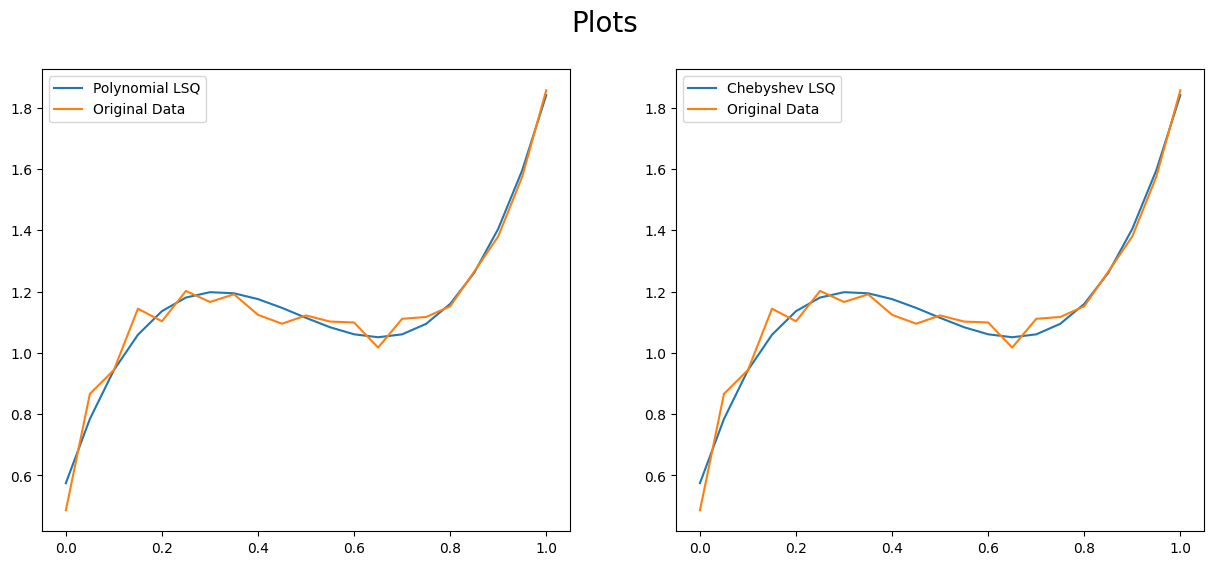

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Plots", fontsize=20)
axs[0].plot(x, func(x, *polytuple), label="Polynomial LSQ")
axs[0].plot(x, y, label="Original Data")
axs[1].plot(x, func(x, *chebytuple, basis="cheby"), label="Chebyshev LSQ")
axs[1].plot(x, y, label="Original Data")

axs[0].legend()
axs[1].legend()
plt.show()


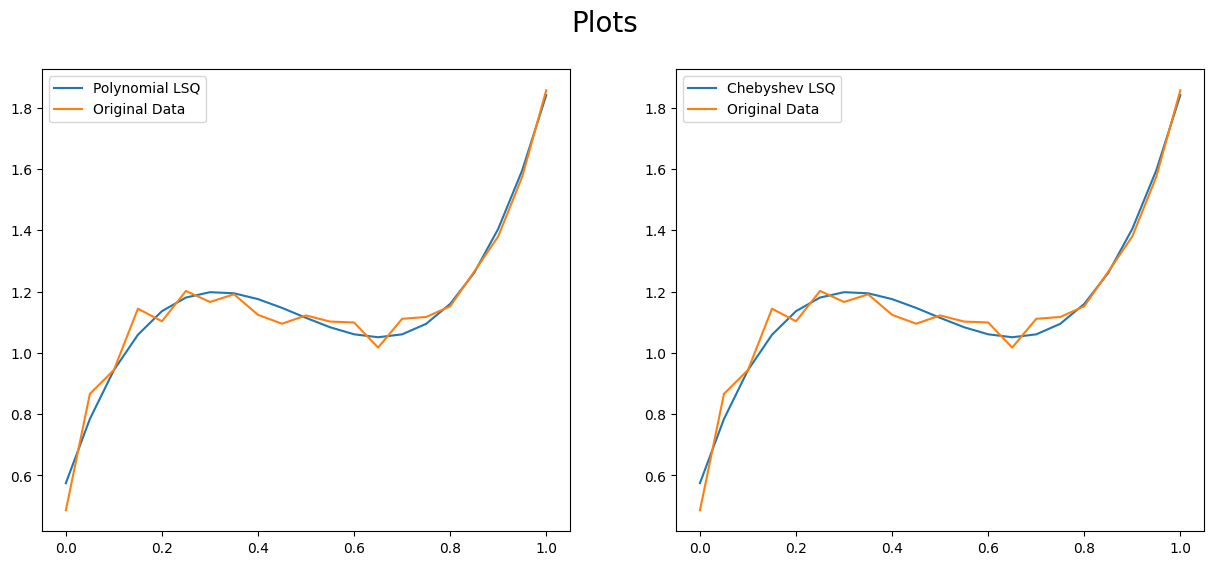

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Plots", fontsize=20)
axs[0].plot(x, func(x, *polytuple), label="Polynomial LSQ")
axs[0].plot(x, y, label="Original Data")
axs[1].plot(x, func(x, *chebytuple, basis="cheby"), label="Chebyshev LSQ")
axs[1].plot(x, y, label="Original Data")

axs[0].legend()
axs[1].legend()
plt.show()